In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to sys.path if not already there
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from src.data.data_loader import get_top_words, train_data, test_data, data_transformed
from src.features.build_features import build_X

In [3]:
# load train and test data
newsgroups_train = train_data()
newsgroups_test = test_data()

In [5]:
# glimpse of data
print(newsgroups_train.data[1])
print(newsgroups_train.target[1])

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.
4


Top 20 words in train dataset combined are: 
AX AX | one | will | MAX AX | AX MAX | people | use | know | think | U | time | say | make | new | may | problem | well | see | now | system


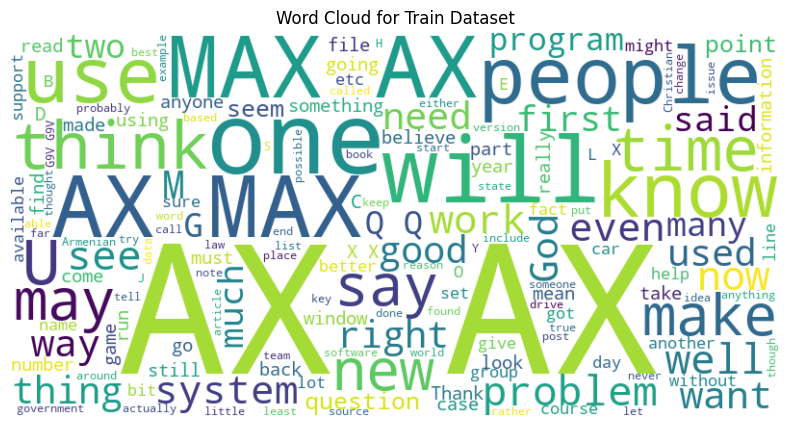

In [7]:
# top 20 words in train and word cloud
words = " ".join(newsgroups_train.data)

top_words_in_train_freq, top_words_in_train = get_top_words(data=words,
                                                            top_n=20)
print('Top 20 words in train dataset combined are: \n{}'.format(top_words_in_train))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    min_font_size=10
).generate_from_text(words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Train Dataset')

plt.show()

Top 20 words in test dataset combined are: 
one | will | people | know | use | think | time | U | say | make | may | see | God | now | well | way | problem | even | X | new


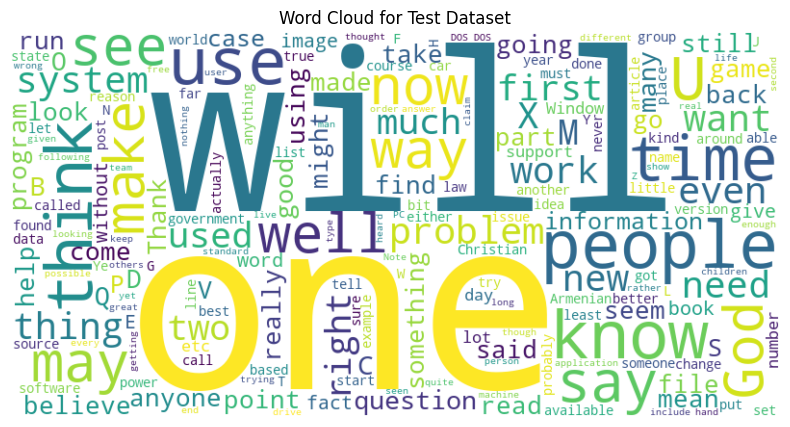

In [8]:
# top 20 words in test and word cloud
words = " ".join(newsgroups_test.data)
top_words_in_test_freq, top_words_in_test = get_top_words(data=words,
                                                          top_n=20)
print('Top 20 words in test dataset combined are: \n{}'.format(top_words_in_test))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    min_font_size=10
).generate_from_text(words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Test Dataset')

plt.show()

In [9]:
# transformed data with additional columns
df = data_transformed(data = newsgroups_train)
df

,Target,Text,Target Article Category,Article Length
0,7,I was wondering if anyone out there could enli...,rec.autos,475
1,4,A fair number of brave souls who upgraded thei...,comp.sys.mac.hardware,530
2,4,"well folks, my mac plus finally gave up the gh...",comp.sys.mac.hardware,1659
3,1,\nDo you have Weitek's address/phone number? ...,comp.graphics,95
4,14,"From article <C5owCB.n3p@world.std.com>, by to...",sci.space,448
...,...,...,...,...
11309,13,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,sci.med,1782
11310,4,"I have a (very old) Mac 512k and a Mac Plus, b...",comp.sys.mac.hardware,674
11311,3,I just installed a DX2-66 CPU in a clone mothe...,comp.sys.ibm.pc.hardware,581
11312,1,\nWouldn't this require a hyper-sphere. In 3-...,comp.graphics,311


In [10]:
# top ten words for each article category for all aggregated articles at article category level
aggregations = {
    'Count of Articles': ('Text', 'count'),
    'Average Article Length': ('Article Length', 'mean'),  
    'Std Dev Article Length': ('Article Length', 'std'),
    'Median Article Length': ('Article Length', 'median'),
    'Aggregated Text': ('Text', lambda x: '\n'.join(x)),
}
df1 = df.groupby(['Target', 'Target Article Category']).agg(**aggregations) .reset_index()
df1['Top 10 words'] = df1['Aggregated Text'].apply(lambda x: get_top_words(data=x, top_n=10)[1])
df1

,Target,Target Article Category,Count of Articles,Average Article Length,Std Dev Article Length,Median Article Length,Aggregated Text,Top 10 words
0,0,alt.atheism,480,1156.543750,3413.015911,529.0,\nDon't be so sure. Look what happened to Jap...,God | one | people | will | think | atheist | ...
1,1,comp.graphics,584,1032.464041,4656.998939,375.0,\nDo you have Weitek's address/phone number? ...,image | file | will | program | use | JPEG | s...
2,2,comp.os.ms-windows.misc,591,2242.323181,9599.637340,400.0,I have win 3.0 and downloaded several icons an...,AX AX | M | MAX AX | AX MAX | G | Q Q | L | C ...
3,3,comp.sys.ibm.pc.hardware,590,794.003390,2112.623090,458.0,...,drive | SCSI | one | use | system | will | car...
4,4,comp.sys.mac.hardware,578,636.351211,1995.491864,394.0,A fair number of brave souls who upgraded thei...,Mac | one | Apple | problem | use | drive | wi...
5,5,comp.windows.x,593,1544.603710,6090.300692,497.0,QUESTION:\n What is the EXACT entry (paramete...,X X | X | use | program | will | window | widg...
6,6,misc.forsale,585,687.249573,1212.084621,408.0,Reduced Prices! \nI have a list of things fors...,sale | new | one | DOS | game | will | price |...
7,7,rec.autos,594,680.920875,1481.324505,380.5,I was wondering if anyone out there could enli...,car | will | one | time | engine | good | thin...
8,8,rec.motorcycles,598,621.665552,1563.394799,361.5,I have a line on a Ducati 900GTS 1978 model wi...,bike | one | know | will | ride | motorcycle |...
9,9,rec.sport.baseball,597,708.033501,1178.888744,332.0,Doug Roberts - Ken Hill for NL MVP!!\n\t ...,game | team | year | one | player | think | wi...


Here it can be seen that for category **comp.os.ms-windows.misc** and **comp.windows.x** we have words **AX AX | M | MAX AX | XX | X** occurring the most. They seem like some form of encoded words and not plain english words. It would likely make sense to remove such encoded words or classify them under STOP WORDS, but we shall retain them as it is difficult to locate such words accurately in train datasets and such occurences might be common in test datasets as well. This potentially may be helpful in classification.

Here we can create **length of article** as a potential feature. However, looking at the standard deviation being almost as twice or more as big as the mean might indicate that **length of article** may not exactly be a discriminative feature for classifiers. However, to confirm our hypothesis we shall fit two versions for each classifier we fit, both with and without the **length of article** feature.

Looking at the count of articles, our class **target article category** seems to be reasonably balanced.

In [11]:
# Separate features (X) and target (y)
X = df['Text']
y = df['Target']

build_X(x_input = X, augment = False, x_augment = df['Article Length'])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 504063 stored elements and shape (11314, 5000)>